## Exploring texture
This notebook is intended for exploring texture of the dataset (images and metadata).

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
import sys
sys.path.append("../")

### Load global constants

In [2]:
# Available categories in the dataset
dataset = ['COVID','NORMAL','Viral Pneumonia','Lung_Opacity']

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/COVID-19_Radiography_Dataset/'
preprocessed_data_dir = '../data/preprocessed/'

In [3]:
from src.preprocessing.image_preprocessor import plot_images_statistics
from src.preprocessing.image_texture import get_images_texture, crop_image
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

## Find texture for a selected image
To find the texture for a single image, we use `graycomatrix` and `graycoprops` functions to get GLCM (Gray Level Co-occurrence Matrix) 

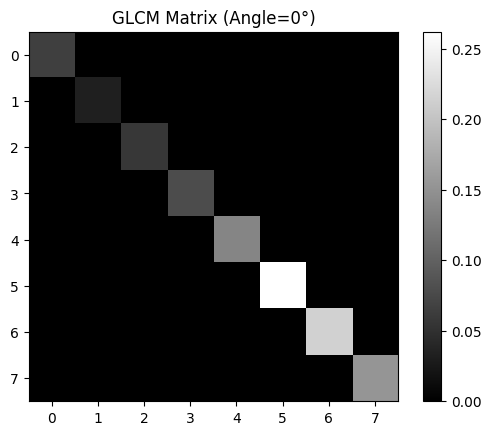

In [4]:
image_path = raw_data_dir+'/COVID/images/COVID-3411.png'
image = crop_image(image_path)
quantized_image = (image[0] / 32).astype('uint8')

# Compute GLCM
glcm = graycomatrix(quantized_image, distances=[0], angles=[0], levels=8, symmetric=True, normed=True)

# Visualize GLCM
plt.imshow(glcm[:, :, 0, 0], cmap='gray')
plt.title('GLCM Matrix (Angle=0°)')
plt.colorbar()
plt.show()

## Find texture for all images

Processing images for: COVID


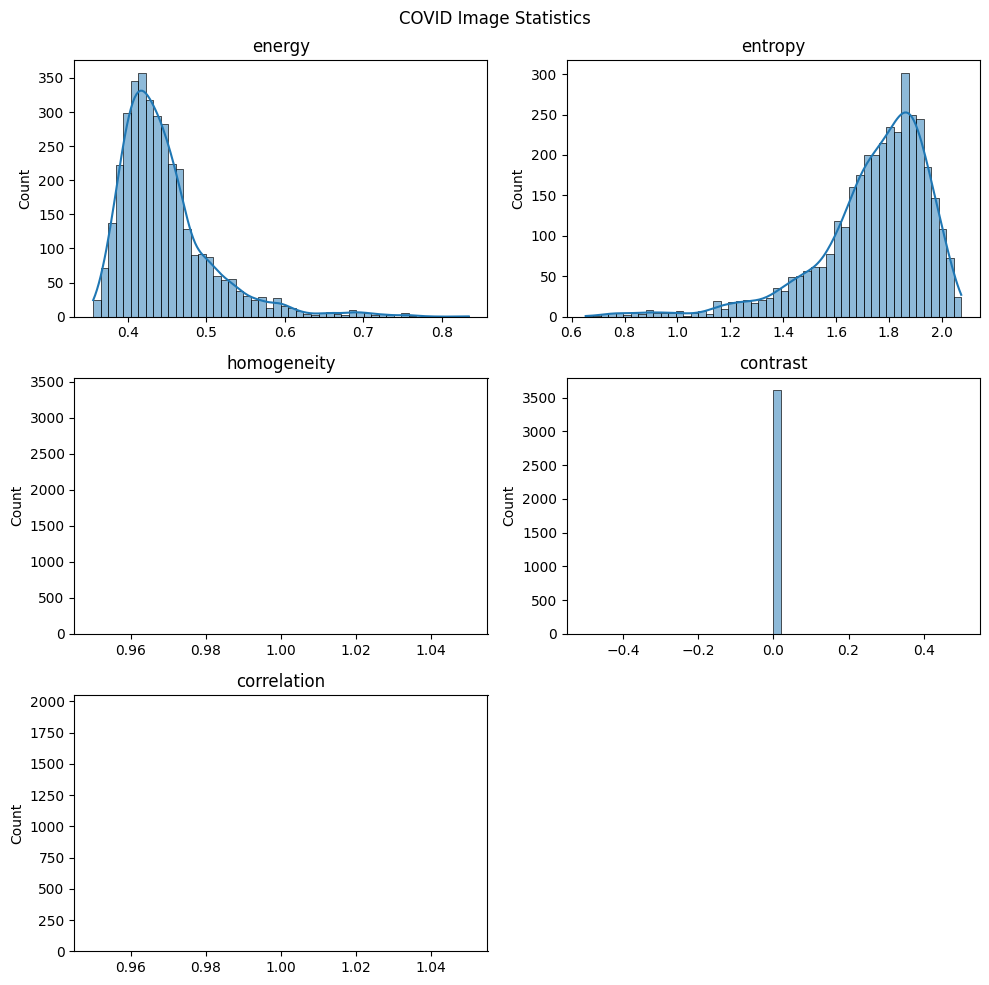

Processing images for: NORMAL


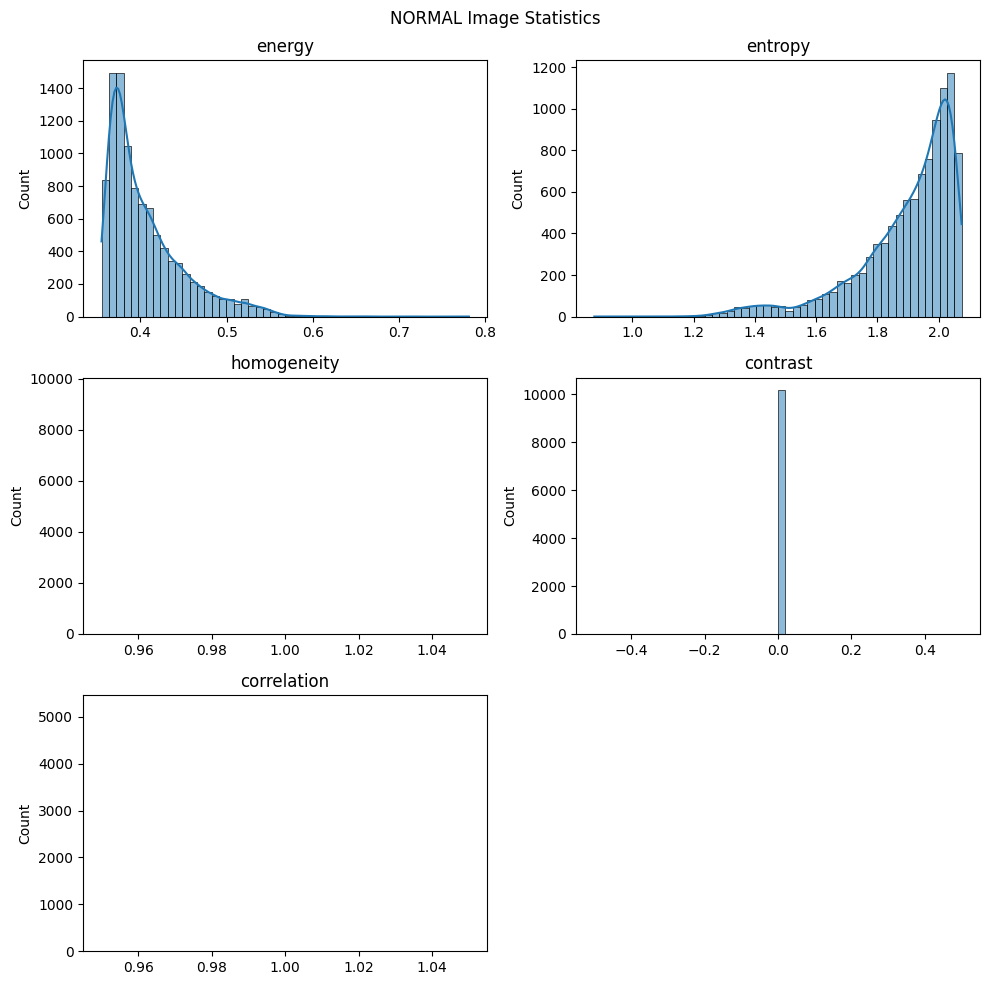

Processing images for: Viral Pneumonia


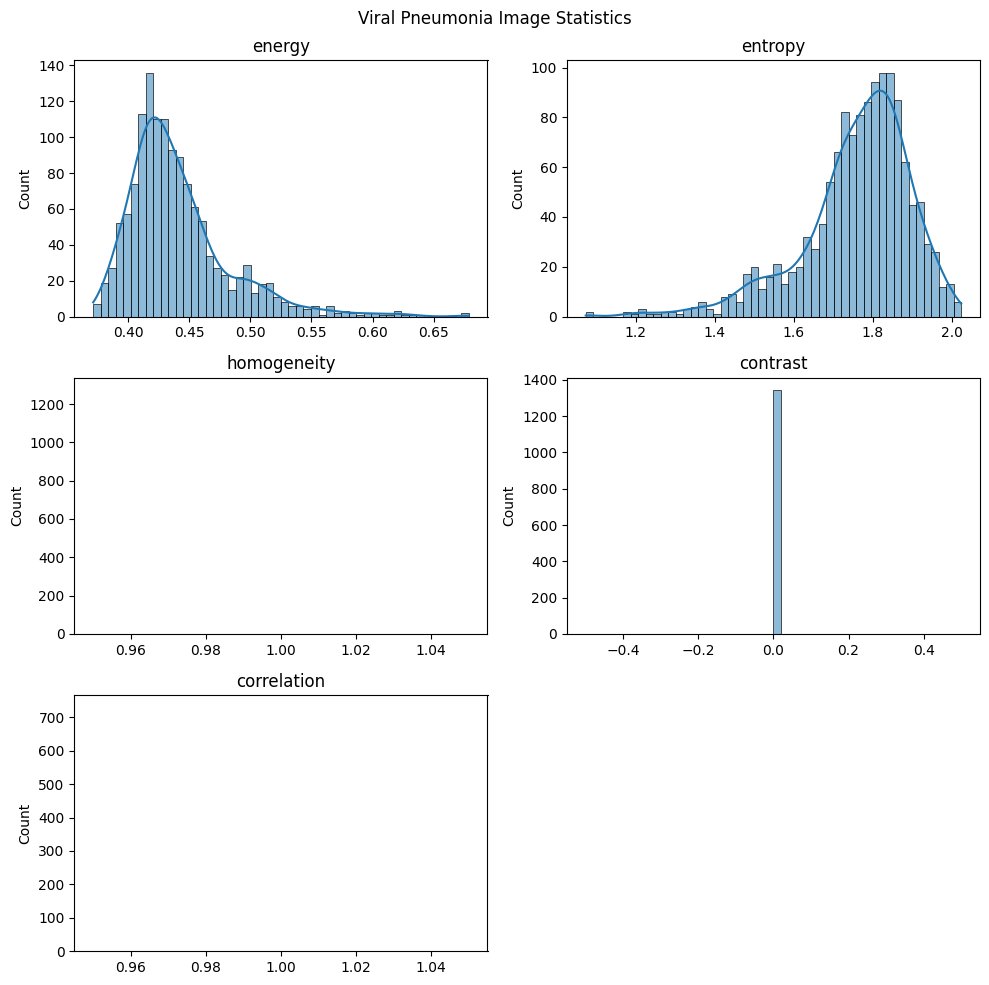

Processing images for: Lung_Opacity


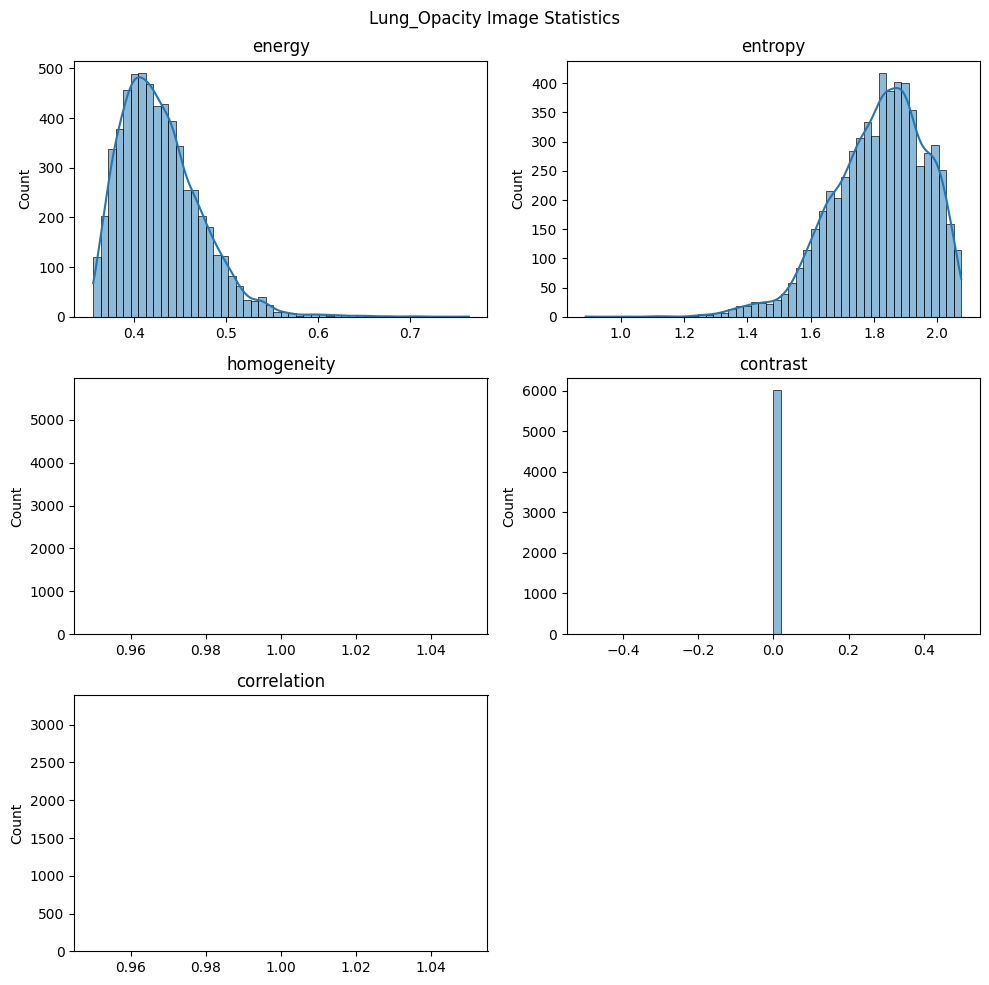

In [5]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_texture(raw_data_dir+i+'/images')
    plot_images_statistics(i,image_stats)
    del image_stats